#### Another way of defining a network is a neural network class that inherits nn.Module and defines the layers that will be used and implements a method to define how forward propagation occurs

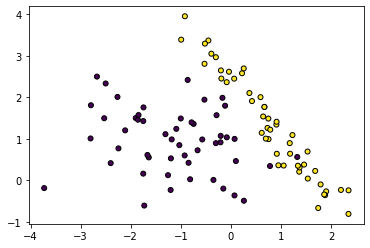

In [1]:
# Preparing the dataset
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                          n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=15)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolors='k')

##### Defining a simple neural network with an input layer that accepts two inputs: a hidden layer with eight nodes and an output layer with one node denoting the class (0 or 1)

In [5]:
import torch, torch.nn as nn, torch.nn.functional as F
import numpy as np

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 8)
        self.hidden = nn.Linear(8,8)
        self.output = nn.Linear(8,1)
        
    def forward(self, x):
        x = self.input(x)
        x = F.relu(x)
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

**This class can be instantiated, and model can be trained over multiple epochs**

In [6]:
mymodel = MyNetwork()

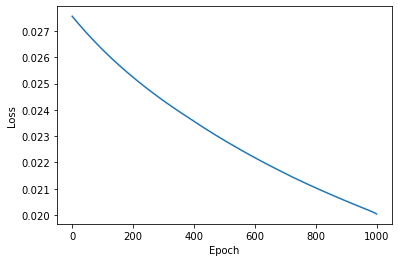

In [8]:
# printing a graph to show the change in losses
data = torch.tensor(X.astype(np.float32))
labels = torch.tensor(y.reshape(1, 100).T.astype(np.float32))
lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(mymodel.parameters(), lr=.05)
epochs = 1000
losses = torch.zeros(epochs)

for epoch in range(epochs):
    pred = mymodel(data)
    loss = lossfun(pred, labels)
    losses[epoch] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
#showing losses
plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Creating such classes helps us define a more sophisticated network block that may be composed of multiple smaller blocks**